In [36]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from bisectingKmeans import BisectingKmeans

In [37]:
data = datasets.load_iris()
X = data.data

In [38]:
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [39]:
df = pd.DataFrame(X, columns=data.feature_names)
df.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
df

petal length (cm)  petal width (cm)
0             0.067797          0.041667
1             0.067797          0.041667
2             0.050847          0.041667
3             0.084746          0.041667
4             0.067797          0.041667
..                 ...               ...
145           0.711864          0.916667
146           0.677966          0.750000
147           0.711864          0.791667
148           0.745763          0.916667
149           0.694915          0.708333

[150 rows x 2 columns]

In [40]:
df.isnull().sum()

petal length (cm)    0
petal width (cm)     0
dtype: int64

In [41]:
b_kmeans = BisectingKmeans(k=3)
b_kmeans.bisecting_kmeans(df)
clusters = b_kmeans.clusters

d:\Github\ML\Machine-Learning-Basics\Clustering\bisectingKmeans.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\Github\ML\Machine-Learning-Basics\Clustering\bisectingKmeans.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


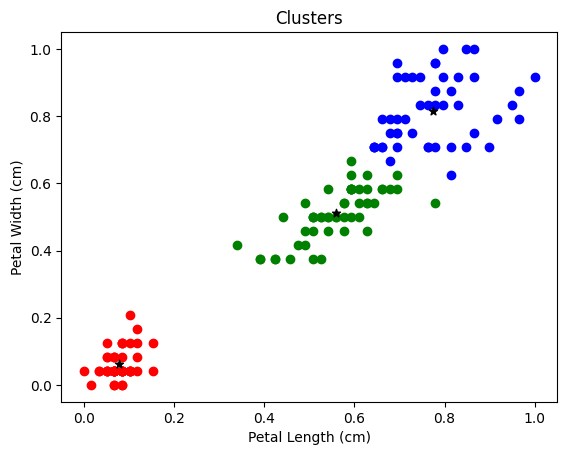

In [42]:
# visualize clusters

df1 = clusters[0]
df2 = clusters[1]
df3 = clusters[2]


plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue')


# centroids
plt.scatter(b_kmeans.centroids[:,0], b_kmeans.centroids[:,1], marker='*', color='black')

plt.title('Clusters')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels, y)
acc